In [4]:
pip install lecroyparser

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from matplotlib import pyplot as plt
import os
import lecroyparser

# mount my drive 
#from google.colab import drive
#drive.mount('/content/drive')
path='/jupyter-workspace/cloud-storage/cygno-data/WC/'

C1--WC--02802.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWaveRunner
Instrument Number: 20543
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 2002
Vertical Coupling: DC1M
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 10 ns/div
TriggerTime: 2023-05-08 15:38:11.36

2.59448e-06 10 ns/div -9.944604023496574e-08 0.076


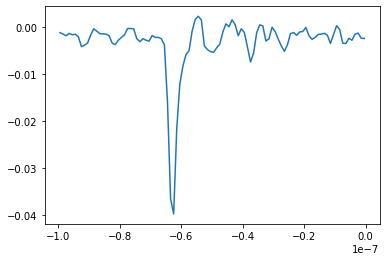

 int: 2.08e-10, min: -0.040, mean out of time: -0.002


In [11]:
def wave_s(path, filename, verbose=False):
    import numpy as np
    if verbose: 
        print(filename)
        
    f = open(path+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
    plt.plot(data.x, data.y)

    if verbose: 
        print (data)
        print(data.verticalGain, data.timeBase, data.horizOffset, data.verticalOffset)
    f.close()
    plt.show()
    print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.3f}".format(np.trapz(data.x, data.y),  
                                                        np.min(data.y), 
                                                        np.mean(data.y[data.x<-0.7e-7])))
wave_s(path, filename='C1--WC--02802.trc', verbose=True)

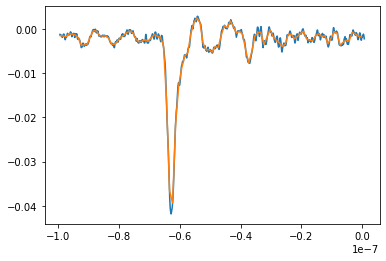

In [12]:
from scipy import signal
data = lecroyparser.ScopeData(path+'C1--WC--02802.trc')
plt.plot(data.x, data.y)
data_rs = signal.resample(data.y, usamle, data.x)
plt.plot(data_rs[1], data_rs[0])
plt.show()
 

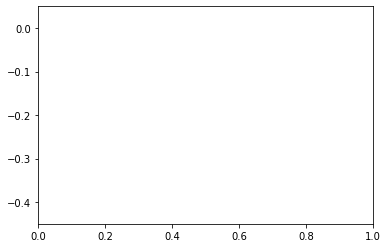

C0 0


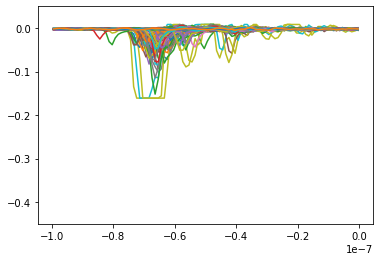

C1 107


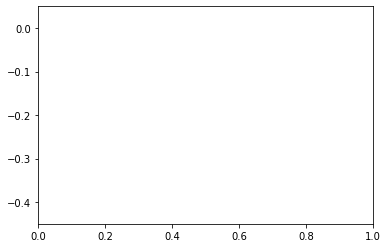

C2 0


In [9]:
def wave(path, files, th = -0.05, verbose=False):
    under_th = []
    for i, filename in enumerate(files):
        if verbose: print(i, filename)
        f = open(path+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
        plt.plot(data.x, data.y)
        if min(data.y)<th:
            under_th.append(filename)
            
        if verbose: print (data)
        f.close()
    plt.ylim(-0.45, 0.05)
    plt.show()
    return under_th

path='/jupyter-workspace/cloud-storage/cygno-data/WC/'
th = -0.01
files_all = os.listdir(path)
# siamo al centro
# file 610 cambiata soglia C2 a 1900
# 672 HV 1850
# 725 cambiata scala oscilloscopio al centro
# 1080 spostato su C2
# 1430 ci spostiemo su C1
# 2170 rimettiamo al 
# in mezzo butta
# 2337 vicino C2
#files_all = [f for f in files_all if (int(f[8:13]) > 1080 and int(f[8:13]) < 1420) ]
# files_all = [f for f in files_all if (int(f[8:13]) > 725 and int(f[8:13]) < 1070) ]
#files_all = [f for f in files_all if (int(f[8:13]) > 1430 and int(f[8:13]) < 2160) ]
files_all = [f for f in files_all if (int(f[8:13]) > 2340) ]
usamle = 100 # -1 read all https://pypi.org/project/lecroyparser/
files = [f for f in files_all if 'C3' in f]
under_th_C3 = wave(path, files, th = th)
print ("C0", len(under_th_C3))
files = [f for f in files_all if 'C1' in f]
under_th_C1 =wave(path, files, th = th)
print ("C1", len(under_th_C1))
files = [f for f in files_all if 'C2' in f]
under_th_C2 =wave(path, files, th = th)
print ("C2", len(under_th_C2))

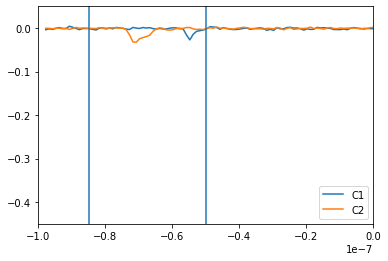

 int: 2.15e-11, min: -0.027, mean out of time: -7.50e-04 -5.478356136095169e-08
 int: 1.90e-10, min: -0.032, mean out of time: -5.93e-04 -7.079446793461509e-08


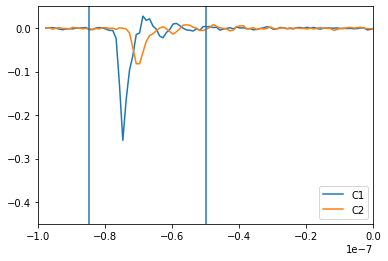

 int: 4.47e-10, min: -0.258, mean out of time: -5.59e-04 -7.479717821228288e-08
 int: 3.11e-10, min: -0.082, mean out of time: -3.82e-04 -6.981887578384458e-08


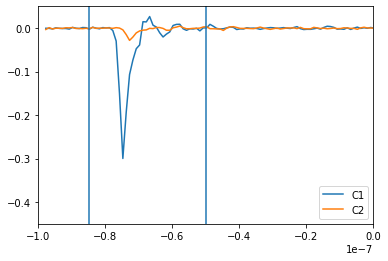

 int: 7.14e-10, min: -0.300, mean out of time: -3.31e-04 -7.478856771708702e-08
 int: -1.08e-11, min: -0.028, mean out of time: -4.80e-04 -7.279982814155161e-08


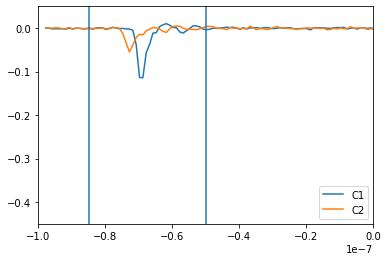

 int: 4.55e-10, min: -0.114, mean out of time: -1.03e-03 -6.880796381468101e-08
 int: 9.82e-11, min: -0.055, mean out of time: -4.35e-04 -7.283072245049472e-08


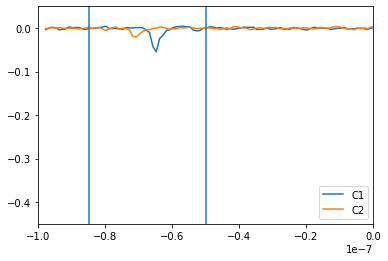

 int: 1.52e-10, min: -0.055, mean out of time: -6.57e-04 -6.481076889969933e-08
 int: 2.04e-10, min: -0.020, mean out of time: -2.12e-04 -7.081453445346209e-08


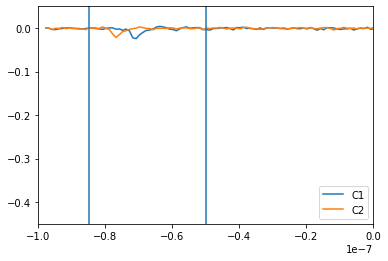

 int: 2.19e-10, min: -0.024, mean out of time: -1.05e-03 -7.082016068089322e-08
 int: 1.74e-10, min: -0.022, mean out of time: -1.06e-03 -7.683508661898712e-08


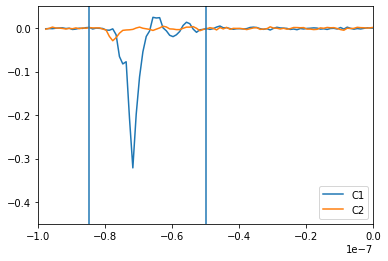

 int: 1.33e-09, min: -0.321, mean out of time: -7.54e-04 -7.180510242515969e-08
 int: 2.45e-10, min: -0.029, mean out of time: -4.90e-04 -7.782886058793949e-08


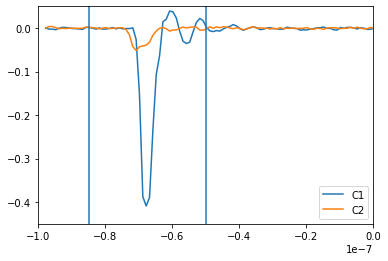

 int: 1.90e-09, min: -0.409, mean out of time: -7.99e-04 -6.78217286483894e-08
 int: 4.55e-10, min: -0.051, mean out of time: 4.04e-04 -7.08194125022426e-08


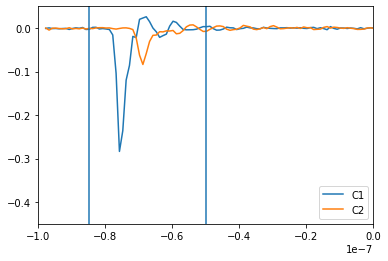

 int: 6.30e-10, min: -0.284, mean out of time: -8.54e-04 -7.580946659365209e-08
 int: 3.07e-10, min: -0.084, mean out of time: -1.07e-03 -6.879653566559432e-08


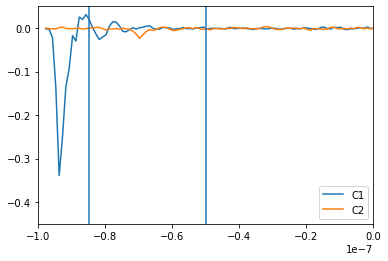

 int: 1.66e-09, min: -0.026, mean out of time: -7.30e-02 -9.381118221809114e-08
 int: 1.41e-10, min: -0.024, mean out of time: -6.35e-04 -6.981525420217419e-08


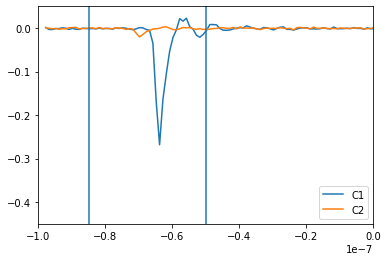

 int: 7.24e-10, min: -0.268, mean out of time: -1.31e-03 -6.381947091005221e-08
 int: 1.31e-10, min: -0.020, mean out of time: -5.66e-04 -6.983014703292066e-08


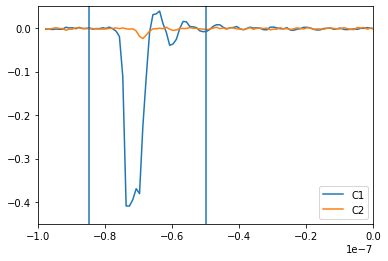

 int: 2.55e-09, min: -0.409, mean out of time: -1.10e-03 -7.381160823446135e-08
 int: 4.58e-12, min: -0.024, mean out of time: -1.18e-03 -6.88180434261265e-08


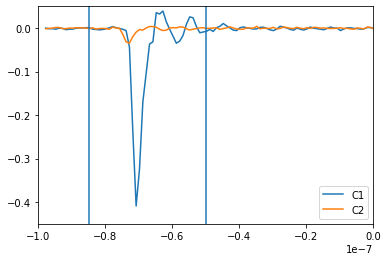

 int: 1.44e-09, min: -0.409, mean out of time: -1.01e-03 -7.082112150868329e-08
 int: 4.14e-11, min: -0.035, mean out of time: -3.30e-05 -7.282200109055381e-08


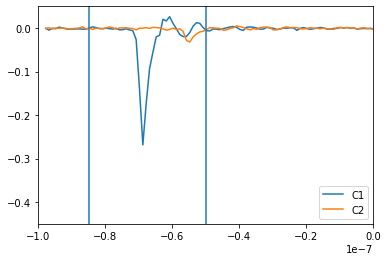

 int: 8.25e-10, min: -0.269, mean out of time: -1.51e-03 -6.881905028918213e-08
 int: 1.27e-10, min: -0.032, mean out of time: -3.60e-04 -5.4796079996787385e-08


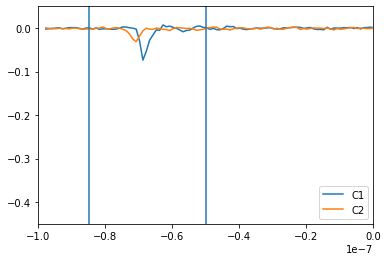

 int: 2.95e-10, min: -0.074, mean out of time: -4.04e-04 -6.880127497506536e-08
 int: 6.77e-11, min: -0.031, mean out of time: -9.36e-04 -7.080721738029138e-08


In [256]:
def wave_s_d(path, fC1, fC2, verbose=False):
    import numpy as np
    x_cut_min = -0.85e-7
    x_cut_max = -0.50e-7
    t_C1 = []
    t_C2 = []
    f = open(path+fC1, 'rb')
    data_C1 = lecroyparser.ScopeData(data = f.read(), sparse = usamle)
    f = open(path+fC2, 'rb')
    data_C2 = lecroyparser.ScopeData(data = f.read(), sparse = usamle)

    plt.plot(data_C1.x, data_C1.y, label="C1")
    plt.plot(data_C1.x, data_C2.y, label="C2")
    plt.axvline(x_cut_min)
    plt.axvline(x_cut_max)

    f.close()
    plt.legend()
    plt.ylim(-0.45, 0.05)
    plt.xlim(-1e-7, 0)
    plt.show()
    t0_C1 = data_C1.x[np.where(data_C1.y == data_C1.y.min())][0]
    t0_C2 = data_C2.x[np.where(data_C2.y == data_C2.y.min())][0]
    x0_C1 = np.min(data_C1.y[data_C1.x<x_cut_min])
    x0_C2 = np.min(data_C2.y[data_C2.x>x_cut_min])
    i0_C1 = np.trapz(data_C1.y[data_C1.x<x_cut_min])
    i0_C2 = np.trapz(data_C2.y[data_C2.x>x_cut_min])

    print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.2e} {}".format(np.trapz(data_C1.x[data_C1.x>x_cut_min], 
                                                                                data_C1.y[data_C1.x>x_cut_min]),  
                                                         np.min(data_C1.y[data_C1.x>x_cut_min]), 
                                                         np.mean(data_C1.y[data_C1.x<x_cut_min]), t0_C1))
    print(" int: {:.2e}, min: {:.3f}, mean out of time: {:.2e} {}".format(np.trapz(data_C2.x[data_C2.x>x_cut_min], 
                                                                                data_C2.y[data_C2.x>x_cut_min]),  
                                                         np.min(data_C2.y[data_C2.x>x_cut_min]), 
                                                         np.mean(data_C2.y[data_C2.x<x_cut_min]), t0_C2))
    return t0_C1, t0_C2, x0_C1, x0_C2, i0_C1, i0_C2
i = 21
t_C1 = []
t_C2 = []
x_C1 = []
x_C2 = []
i_C1 = []
i_C2 = []
for i in range(np.min([len(under_th_C2), len(under_th_C1)])):
    t0_C1, t0_C2, x0_C1, x0_C2, i0_C1, i0_C2 = wave_s_d(path, under_th_C1[i], under_th_C2[i], verbose=True)
    t_C1.append(t0_C1)
    t_C2.append(t0_C2)
    x_C1.append(x0_C1)
    x_C2.append(x0_C2)
    i_C1.append(i0_C1)
    i_C2.append(i0_C2)


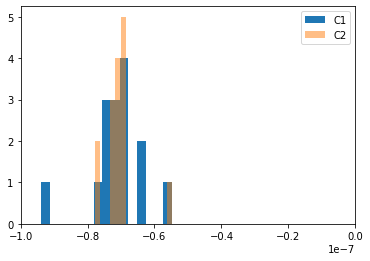

In [257]:
plt.hist(t_C1, len(t_C1), label="C1")
plt.hist(t_C2, len(t_C2), label="C2", alpha=0.5)
plt.xlim(-1e-7, 0)
plt.legend()
plt.show()

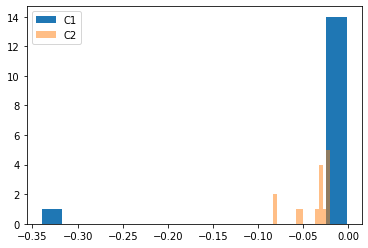

In [258]:
plt.hist(x_C1, len(x_C1), label="C1")
plt.hist(x_C2, len(x_C2), label="C2", alpha=0.5)

plt.legend()
plt.show()

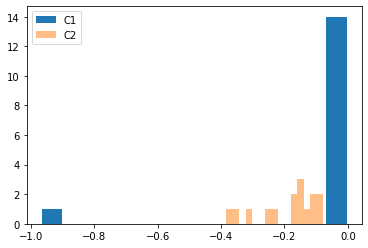

In [259]:
plt.hist(i_C1, len(i_C1), label="C1")
plt.hist(i_C2, len(i_C2), label="C2", alpha=0.5)

plt.legend()
plt.show()

In [ ]:
2021-01-03 06:20:41 - 2023-04-28 19:21:49

In [3]:
import time
import datetime
s1 = "2021-01-03 06:20:41"
s2 = "2023-04-28 19:21:49"
t1 = time.mktime(datetime.datetime.strptime(s1, "%Y-%m-%d %H:%M:%S").timetuple())
t2 = time.mktime(datetime.datetime.strptime(s2, "%Y-%m-%d %H:%M:%S").timetuple())
print(t2-t1)

73051268.0
